In [2]:
from keras.applications.inception_v3 import InceptionV3
from keras.preprocessing import image
from keras.models import Model
from keras.layers import Dense, GlobalAveragePooling2D
from keras import backend as K

Using TensorFlow backend.


In [3]:
import numpy as np
import pandas as pd
import os
import cv2
import matplotlib.image as img
from tqdm import tqdm
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D



In [4]:
df_train = pd.read_csv("labels.csv")
df_train.head(10)

,id,breed
0,000bec180eb18c7604dcecc8fe0dba07,boston_bull
1,001513dfcb2ffafc82cccf4d8bbaba97,dingo
2,001cdf01b096e06d78e9e5112d419397,pekinese
3,00214f311d5d2247d5dfe4fe24b2303d,bluetick
4,0021f9ceb3235effd7fcde7f7538ed62,golden_retriever
5,002211c81b498ef88e1b40b9abf84e1d,bedlington_terrier
6,00290d3e1fdd27226ba27a8ce248ce85,bedlington_terrier
7,002a283a315af96eaea0e28e7163b21b,borzoi
8,003df8b8a8b05244b1d920bb6cf451f9,basenji
9,0042188c895a2f14ef64a918ed9c7b64,scottish_deerhound


In [5]:
# df_train.groupby('breed') 
# print(df_train.groupby('breed').groups) 

In [6]:
gk = df_train.groupby('breed')  
gk.first()  


,id
breed,
affenpinscher,00ca18751837cd6a22813f8e221f7819
afghan_hound,0379145880ad3978f9b80f0dc2c03fba
african_hunting_dog,00792e341f3c6eb33663e415d0715370
airedale,0267c5f1acbab52ae4a7927e0398612b
american_staffordshire_terrier,02f3d5fd1eea0a2e6f4742bc54b51ba9
...,...
welsh_springer_spaniel,01f8540fb1084107a6eb3e528f82c1aa
west_highland_white_terrier,05b5e17b96409ca6db51edaf28bd3bdc
whippet,05e93a5604440b065143c81be16cd395


In [7]:
list1 = df_train.groupby(df_train['breed'])
list1.

SyntaxError: invalid syntax (<ipython-input-7-9f60dffd260d>, line 2)

In [8]:
df_train.shape

(10222, 2)

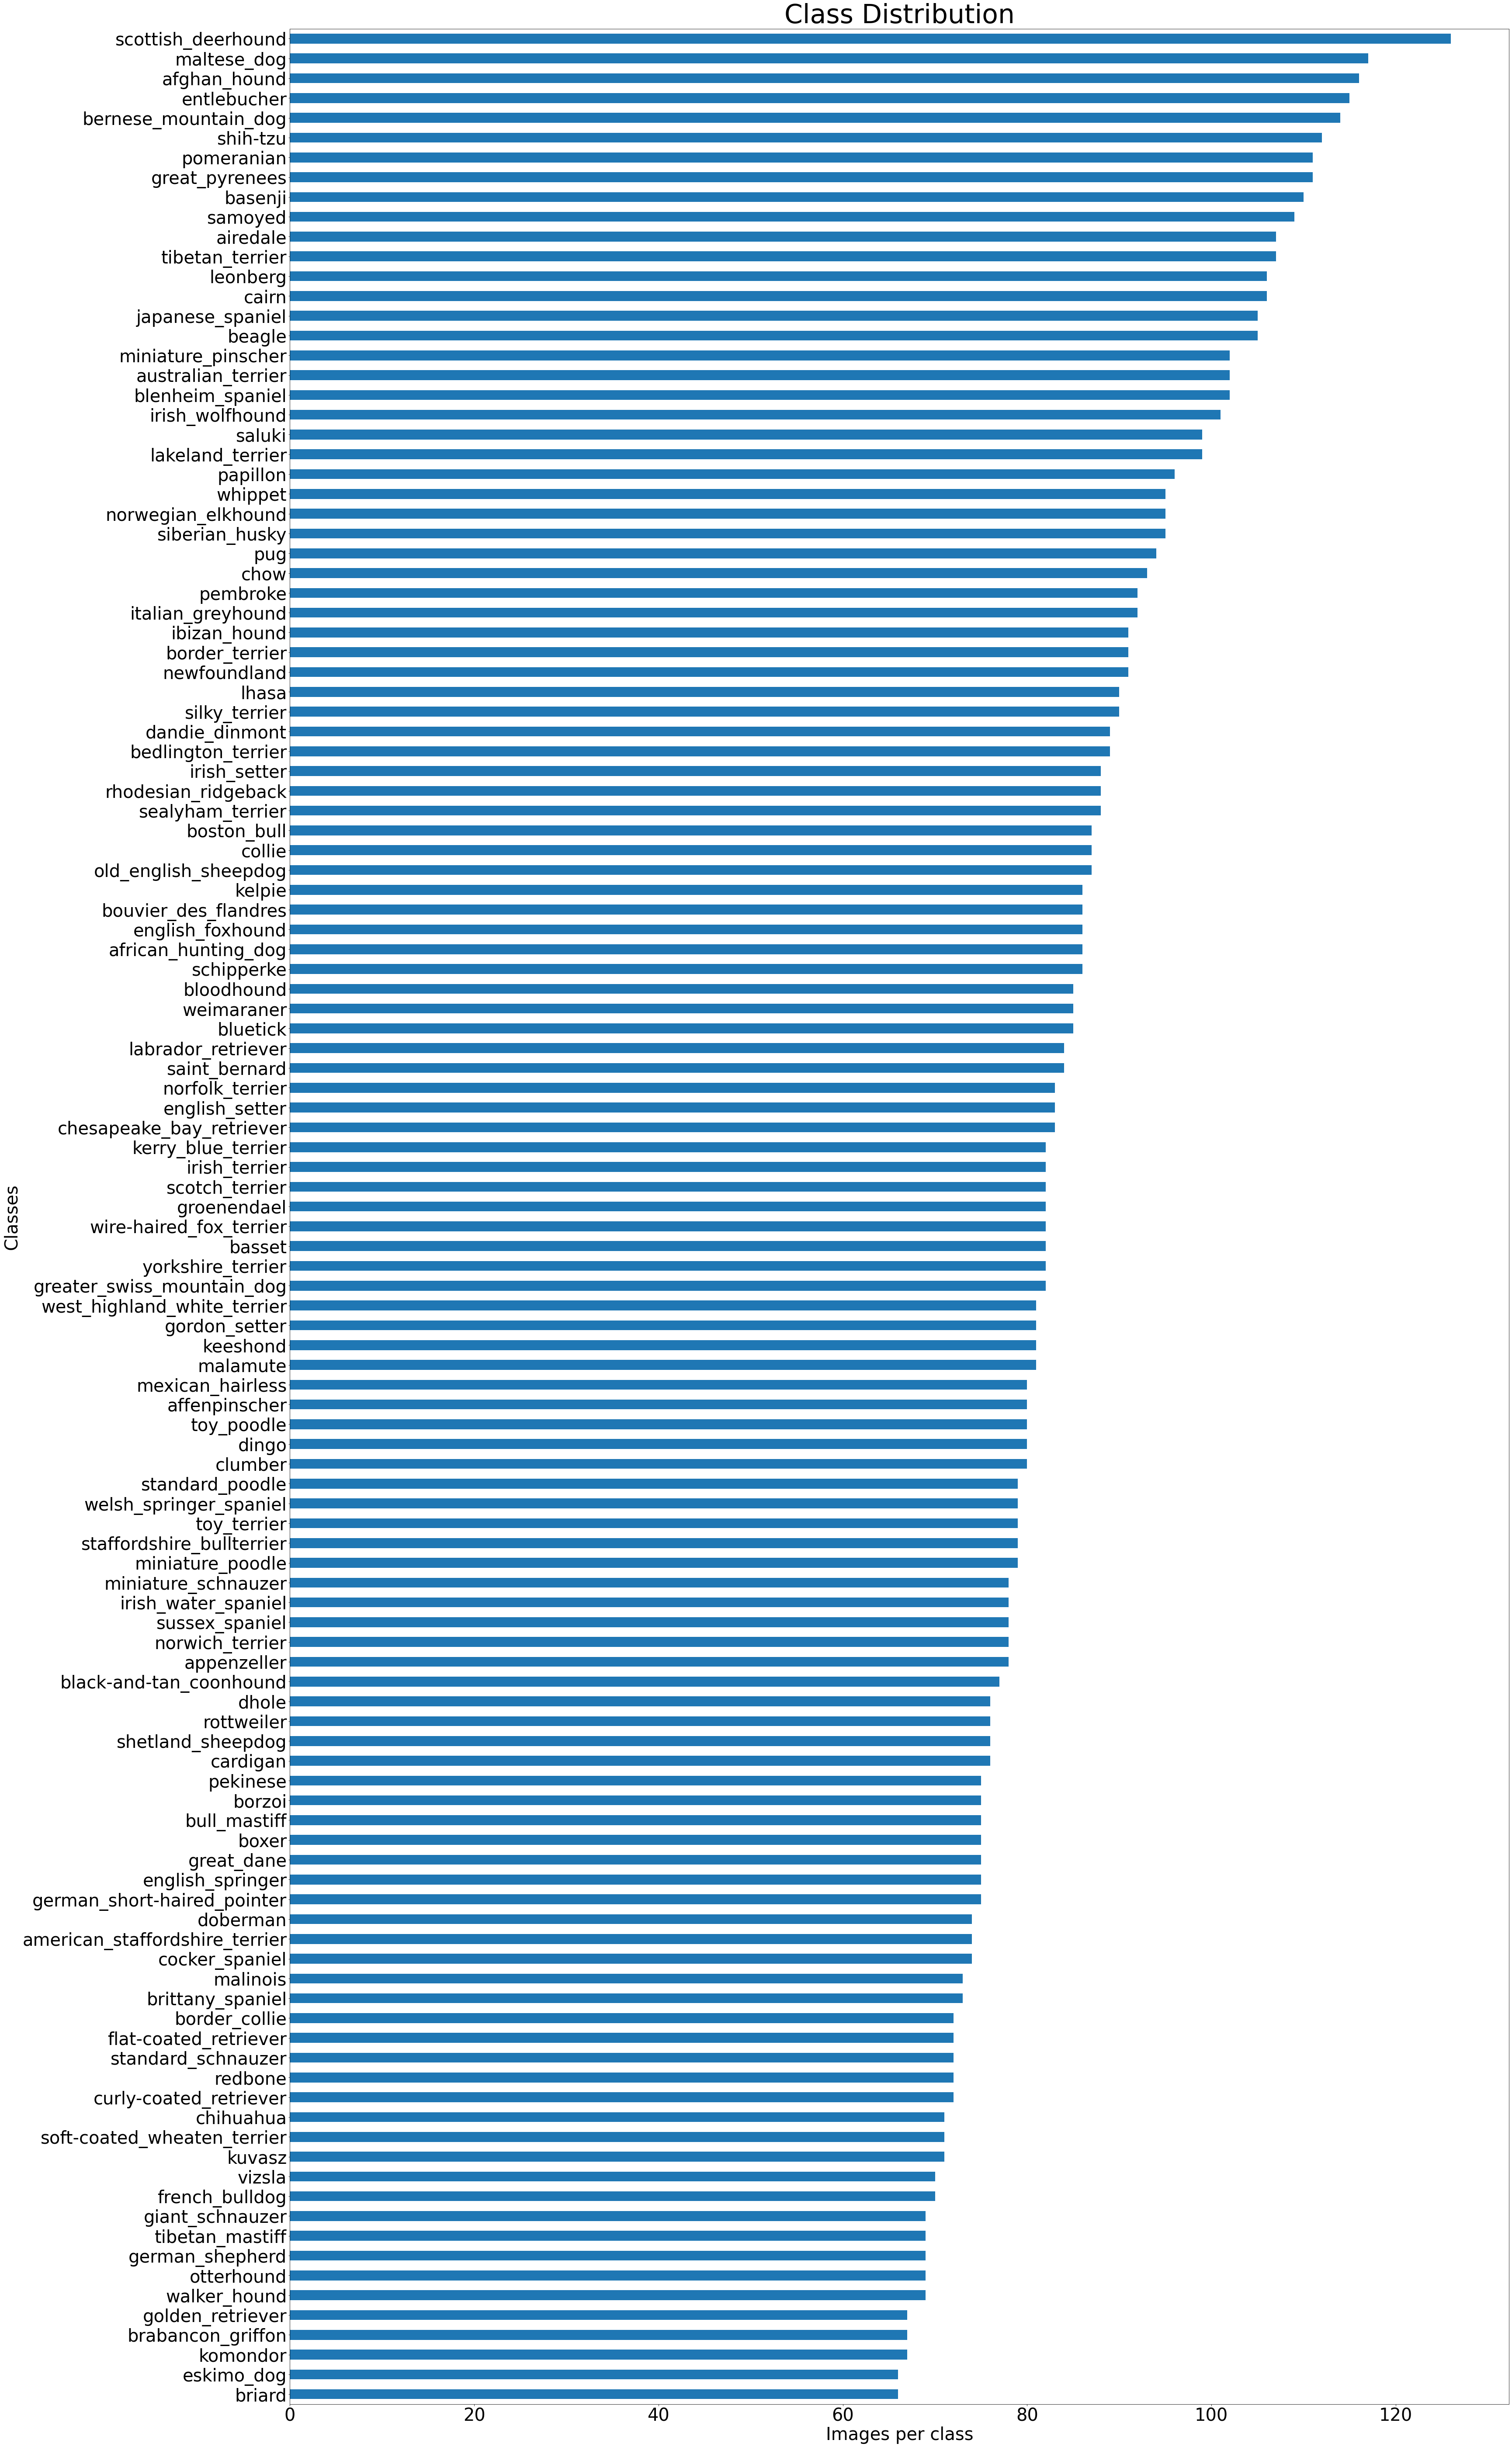

In [9]:
ax=pd.value_counts(df_train['breed'],ascending=True).plot(kind='barh',
                                                       fontsize="40",
                                                       title="Class Distribution",
                                                       figsize=(50,100))
ax.set(xlabel="Images per class", ylabel="Classes")
ax.xaxis.label.set_size(40)
ax.yaxis.label.set_size(40)
ax.title.set_size(60)


In [10]:
# create the base pre-trained model
# base_model = InceptionV3(weights='imagenet', include_top=False)

In [11]:
# base_model.summary()

In [12]:
# os.listdir('./Documents/nisar/dog breed/test/')

In [13]:
# create the base pre-trained model
# base_model = InceptionV3(weights='imagenet', include_top=False)
# x = base_model.output
# x = GlobalAveragePooling2D()(x)
# model = Model(inputs=base_model.input, outputs=x)

In [14]:
model.output

NameError: name 'model' is not defined

In [15]:
import pandas as pd

In [16]:
df = pd.read_csv('./Documents/nisar/dog breed/labels.csv')

FileNotFoundError: [Errno 2] File ./Documents/nisar/dog breed/labels.csv does not exist: './Documents/nisar/dog breed/labels.csv'

In [17]:
df.head()

NameError: name 'df' is not defined

In [18]:
files = df.id.tolist()

NameError: name 'df' is not defined

In [19]:
ls = []
for item in files:
    ls.append('./Documents/nisar/dog breed/train/' + item + '.jpg')

NameError: name 'files' is not defined

In [20]:
import time

In [21]:
t = time.time()
features = []
for i, im_path in enumerate(ls):
    img = cv2.imread(im_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = cv2.resize(img, (299,299)) 
    img = img/255.0
    img = img.reshape(1,299, 299, 3)
    out = model.predict(img)
    features.append(out)
    if i%100==0:
        print(i)
#         break


features = np.squeeze(features)

np.save('./Documents/nisar/dog breed/featurs.npy', features)
time.time() - t

FileNotFoundError: [Errno 2] No such file or directory: './Documents/nisar/dog breed/featurs.npy'

In [22]:
features = np.load('./Documents/nisar/dog breed/features.npy')
features

FileNotFoundError: [Errno 2] No such file or directory: './Documents/nisar/dog breed/features.npy'

In [23]:
label = df.breed.tolist()

NameError: name 'df' is not defined

In [11]:
y = df.breed.value_counts()
y = y.keys().tolist()


In [12]:
def fn(item):
    for i, label in enumerate(y):
        if label==item:
            return i

In [13]:
ll=[]
for item in label:
    ll.append(fn(item))
    

In [ ]:
# model = Sequential()
# model.add(Dense(512, activation='relu', input_shape=(2048,)))
# model.add(Dropout(0.2))
# model.add(Dense(512, activation='relu'))
# model.add(Dropout(0.2))
# model.add(Dense(120, activation='softmax'))

# model.summary()

# model.compile(loss='sparse_categorical_crossentropy',
#               optimizer='RMSprop',
#               metrics=['accuracy'])

# history = model.fit(features, np.array(ll),
#                     batch_size=128,
#                     epochs=10,
#                     verbose=1)

In [ ]:
# history = model.fit(features, np.array(ll),
#                     batch_size=128,
#                     epochs=10,
#                     verbose=1)

In [ ]:
# score = model.evaluate(x_test, y_test, verbose=0)
# print('Test loss:', score[0])
# print('Test accuracy:', score[1])

In [ ]:
# # add a global spatial average pooling layer
# x = base_model.output
# x = GlobalAveragePooling2D()(x)
# # let's add a fully-connected layer
# x = Dense(1024, activation='relu')(x)
# # and a logistic layer --
# predictions = Dense(1, activation='sigmoid')(x)

# # this is the model we will train
# model = Model(inputs=base_model.input, outputs=predictions)
# for layer in base_model.layers:
#     layer.trainablle = False

In [14]:

from sklearn.model_selection import train_test_split

# Load dataset.

X, y = features , ll

# split data into training and test data.
train_X, test_X, train_y, test_y = train_test_split(X, y, 
                                                    train_size=0.8,
                                                    test_size=0.2,
                                                    random_state=123)
print("Labels for training and testing data")
len(train_y),len(test_y)
 

Labels for training and testing data


(8177, 2045)

In [15]:
train_X.shape

(8177, 2048)

In [16]:
test_X.shape

(2045, 2048)

In [17]:
# model = Sequential()
# model.add(Dense(512, activation='relu', input_shape=(2048,)))
# model.add(Dropout(0.2))
# model.add(Dense(512, activation='relu'))
# model.add(Dropout(0.2))
# model.add(Dense(120, activation='softmax'))

# model.summary()

# model.compile(loss='sparse_categorical_crossentropy',
#               optimizer='RMSprop',
#               metrics=['accuracy'])

# history = model.fit(train_X, np.array(train_y),validation_data=(test_X, test_y),
#                     batch_size=128,
#                     epochs=10,
#                     verbose=1,
                    
#                     )

In [18]:
from keras import optimizers
import keras
keras.__version__

'2.2.1'

In [30]:
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(2048,)))
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(120, activation='softmax'))

# model.summary()

model.compile(loss='sparse_categorical_crossentropy',
              optimizer= 'adam',
              metrics=['accuracy'])

In [32]:
history = model.fit(train_X, np.array(train_y),validation_data=(test_X, test_y),
                    batch_size=64,
                    epochs=5,
                    verbose=1,
                    
                    )

Train on 8177 samples, validate on 2045 samples
Epoch 1/5
8177/8177 [==============================] - 5s 661us/sample - loss: 0.3890 - acc: 0.8799 - val_loss: 0.4986 - val_acc: 0.8425
Epoch 2/5
8177/8177 [==============================] - 5s 655us/sample - loss: 0.3319 - acc: 0.8888 - val_loss: 0.4639 - val_acc: 0.8601
Epoch 3/5
8177/8177 [==============================] - 6s 727us/sample - loss: 0.2682 - acc: 0.9129 - val_loss: 0.4811 - val_acc: 0.8582
Epoch 4/5
8177/8177 [==============================] - 5s 631us/sample - loss: 0.2474 - acc: 0.9172 - val_loss: 0.4624 - val_acc: 0.8670
Epoch 5/5
8177/8177 [==============================] - 5s 610us/sample - loss: 0.2249 - acc: 0.9241 - val_loss: 0.4936 - val_acc: 0.8680


In [58]:
yhat_probs = model.predict(test_X, verbose=0)
yhat_classes = model.predict_classes(test_X, verbose=0)

In [59]:
yhat_probs

array([[7.2390703e-06, 1.5500098e-05, 7.0533105e-07, ..., 1.4474136e-06,
        2.0541470e-06, 1.0084989e-05],
       [6.0298544e-07, 5.5800470e-10, 5.9861911e-08, ..., 2.7440712e-09,
        8.3228699e-08, 1.7406297e-08],
       [8.6705290e-07, 3.1941814e-05, 9.0860556e-07, ..., 9.7895345e-06,
        1.7389888e-06, 2.4316925e-05],
       ...,
       [5.8347156e-05, 1.0723156e-05, 2.4106705e-05, ..., 3.0779961e-04,
        1.6831897e-03, 1.1356687e-04],
       [5.7033102e-08, 1.0223672e-09, 1.9947167e-08, ..., 1.2841702e-11,
        5.5850030e-08, 5.8676166e-09],
       [2.8203681e-07, 1.0483167e-06, 3.6132672e-08, ..., 2.5276300e-08,
        1.6418963e-07, 1.7489524e-06]], dtype=float32)

In [60]:
yhat_probs.shape

(2045, 120)

In [55]:
yhat_classes

array([88, 35, 14, ..., 30, 71, 60])

In [63]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

In [66]:
accuracy = accuracy_score(test_y, yhat_classes)
accuracy

0.8679706601466992

In [73]:
yhat_classes.shape, np.array(test_y).shape

((2045,), (2045,))

In [75]:
precision = precision_score(np.array(test_y), yhat_classes, average='micro')
precision

0.8679706601466992

In [77]:
print('Accuracy: %f' % accuracy)
# precision tp / (tp + fp)
precision = precision_score(test_y, yhat_classes)
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(test_y, yhat_classes, average='micro')
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(test_y, yhat_classes, average='micro')
print('F1 score: %f' % f1)

Accuracy: 0.867971


ValueError: Target is multiclass but average='binary'. Please choose another average setting, one of [None, 'micro', 'macro', 'weighted'].